In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/CSV/seh4 - Sheet1.csv'

df = pd.read_csv(path)
df.describe()

,pm10,so2,co,o3,no2,max
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,53.708333,23.041667,26.083333,59.958333,15.333333,63.666667
std,12.372758,5.262494,6.275672,24.413965,5.264043,21.171488
min,35.000000,18.000000,18.000000,24.000000,8.000000,37.000000
25%,42.500000,19.000000,19.000000,41.750000,10.750000,45.500000
50%,54.000000,21.000000,26.000000,50.500000,14.500000,58.000000
75%,63.750000,27.250000,31.000000,82.500000,20.000000,82.500000
max,72.000000,34.000000,40.000000,111.000000,26.000000,111.000000


In [ ]:
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2015-12-02,72,20,25,111,20,111,O3,TIDAK SEHAT,DKI2
1,2015-12-03,71,32,32,82,26,82,O3,SEDANG,DKI3
2,2015-12-04,66,30,30,84,24,84,O3,SEDANG,DKI3
3,2015-12-06,71,34,40,79,20,79,O3,SEDANG,DKI4
4,2015-12-07,52,31,31,63,15,63,O3,SEDANG,DKI3
5,2015-12-09,62,31,31,65,20,65,O3,SEDANG,DKI2
6,2015-12-10,63,28,22,85,20,85,O3,SEDANG,DKI3
7,2015-12-11,66,27,31,85,23,85,O3,SEDANG,DKI2
8,2015-12-12,61,25,27,90,19,90,O3,SEDANG,DKI2
9,2015-12-14,35,21,24,40,9,40,O3,BAIK,DKI2


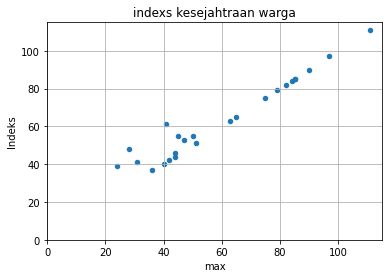

In [ ]:
import matplotlib.pyplot as plt

df.plot(kind='scatter',x='o3', y='max')
plt.title('indexs kesejahtraan warga')
plt.xlabel('max')
plt.ylabel('Indeks')
plt.xlim(0, 115)
plt.ylim(0, 115)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
x = np.array(df['o3'])
y = np.array(df['max'])

print(f'x : {x}')
print(f'y : {y}')

x : [111  82  84  79  63  65  85  85  90  40  42  44  24  44  75  97  36  28
  31  47  45  41  50  51]
y : [111  82  84  79  63  65  85  85  90  40  42  44  39  46  75  97  37  48
  41  53  55  61  55  51]


In [ ]:
x = x.reshape(-1, 1)
x.shape

(24, 1)

In [ ]:
x

array([[111],
       [ 82],
       [ 84],
       [ 79],
       [ 63],
       [ 65],
       [ 85],
       [ 85],
       [ 90],
       [ 40],
       [ 42],
       [ 44],
       [ 24],
       [ 44],
       [ 75],
       [ 97],
       [ 36],
       [ 28],
       [ 31],
       [ 47],
       [ 45],
       [ 41],
       [ 50],
       [ 51]])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:

x_vis = np.array([0, 115]).reshape(-1, 1)
y_vis = model.predict(x_vis )

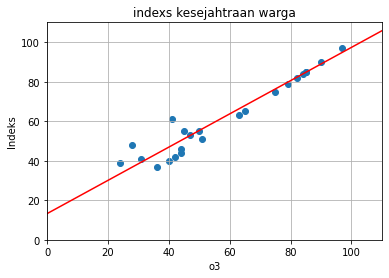

In [ ]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')
plt.title('indexs kesejahtraan warga')
plt.xlabel('o3')
plt.ylabel('Indeks')
plt.xlim(0, 110)
plt.ylim(0, 110)
plt.grid(True)
plt.show()

In [ ]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 13.244189474643989
slope : [0.84095862]


In [ ]:
un= np.array([31, 48, 79, 97, 64]).reshape(-1, 1)
un

array([[31],
       [48],
       [79],
       [97],
       [64]])

In [ ]:
prediksi_indeks = model.predict(un)
prediksi_indeks

array([39.31390666, 53.61020318, 79.67992037, 94.81717551, 67.06554108])

In [ ]:
for penduduk, index in zip(un, prediksi_indeks):
  print(f'lingkungan : {penduduk} prediksi indeks : {index}')

lingkungan : [31] prediksi indeks : 39.31390666079053
lingkungan : [48] prediksi indeks : 53.610203182225725
lingkungan : [79] prediksi indeks : 79.67992036837227
lingkungan : [97] prediksi indeks : 94.81717550871542
lingkungan : [64] prediksi indeks : 67.06554108475297


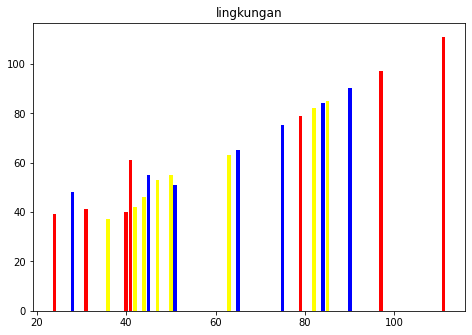

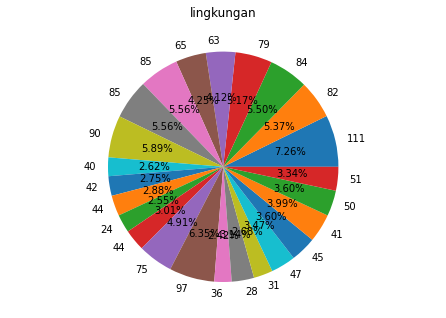

In [ ]:
print()
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
jurusan = df ["o3"]
siswa = df ["max"]
c = ['red','yellow','blue']
plt.title("lingkungan")
ax.bar(jurusan,siswa,color=c)
plt.show()
print()
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title("lingkungan")
jurusan = df ["o3"]
siswa = df ["max"]
ax.pie(siswa,labels=jurusan,autopct='%1.2f%%')

plt.show()